# **Import Libraries:**

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dropout,MaxPooling2D,Flatten
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np


2025-10-03 14:03:05.948483: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759500186.182472      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759500186.244841      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# **Read Dataset:**

## Read Training Data

In [2]:
train_data=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [ ]:
train_generator=train_data.flow_from_directory(
    '/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/',
    target_size=(150, 150),
    batch_size=128,
    class_mode='categorical',
    subset='training'  # Set to 'training' for training images
    
)

Found 56251 images belonging to 38 classes.


## Read Validation Data 

In [ ]:
validation_generator = train_data.flow_from_directory(
    '/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/',
    target_size=(150, 150),
    batch_size=128,
    class_mode='categorical',
    subset='validation'  # Set to 'validation' for validation images
)

Found 14044 images belonging to 38 classes.


## Read Test Data 

In [5]:
test_data=ImageDataGenerator(
    rescale=1./255
)

In [ ]:
test_generator=test_data.flow_from_directory(
    '/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/',
    target_size=(150, 150),
    batch_size=128,
    class_mode='categorical'
    
)

Found 17572 images belonging to 38 classes.


# **Showing Each Class Name and Coressponding Index:**

In [7]:
# Display the 38 unique class names (labels) each one in seperated line 
for label,index in train_generator.class_indices.items():
    print(index," : ",label)
    

0  :  Apple___Apple_scab
1  :  Apple___Black_rot
2  :  Apple___Cedar_apple_rust
3  :  Apple___healthy
4  :  Blueberry___healthy
5  :  Cherry_(including_sour)___Powdery_mildew
6  :  Cherry_(including_sour)___healthy
7  :  Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
8  :  Corn_(maize)___Common_rust_
9  :  Corn_(maize)___Northern_Leaf_Blight
10  :  Corn_(maize)___healthy
11  :  Grape___Black_rot
12  :  Grape___Esca_(Black_Measles)
13  :  Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
14  :  Grape___healthy
15  :  Orange___Haunglongbing_(Citrus_greening)
16  :  Peach___Bacterial_spot
17  :  Peach___healthy
18  :  Pepper,_bell___Bacterial_spot
19  :  Pepper,_bell___healthy
20  :  Potato___Early_blight
21  :  Potato___Late_blight
22  :  Potato___healthy
23  :  Raspberry___healthy
24  :  Soybean___healthy
25  :  Squash___Powdery_mildew
26  :  Strawberry___Leaf_scorch
27  :  Strawberry___healthy
28  :  Tomato___Bacterial_spot
29  :  Tomato___Early_blight
30  :  Tomato___Late_blight
31  :  T

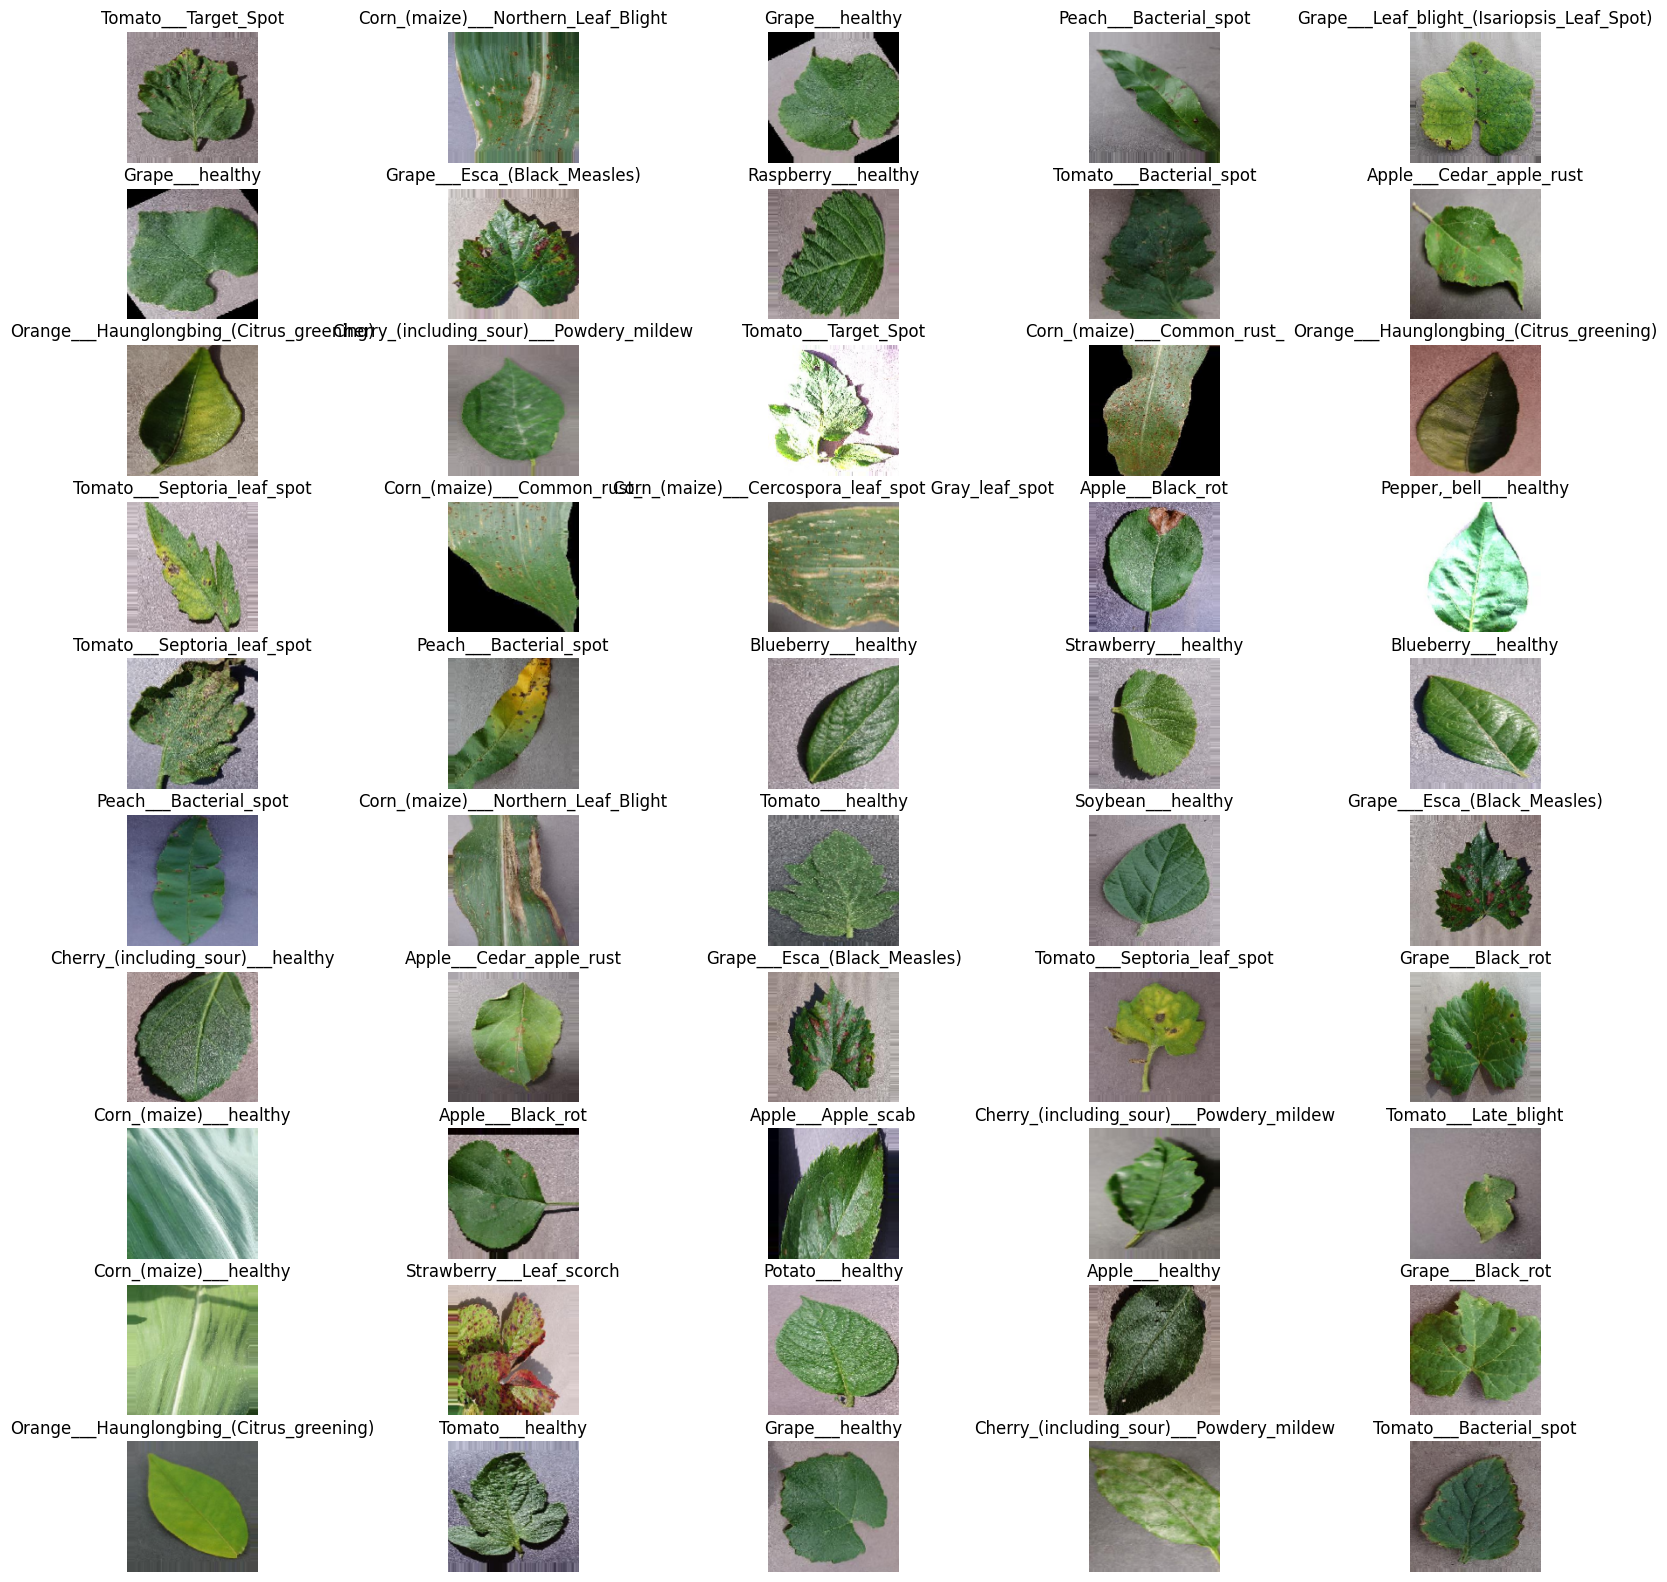

In [8]:
# Get a batch of images and labels from the train_generator
images, labels = next(train_generator)  # Get the next batch (128 images in this case)

# Reverse the class_indices dictionary to get a mapping from index to class name
class_labels = {v: k for k, v in train_generator.class_indices.items()}

# Convert one-hot encoded labels back to the index form (if using categorical mode)
label_indices = np.argmax(labels, axis=1)

# If you want to shuffle the batch and display 50 random images
random_indices = np.random.choice(len(images), 50, replace=False)  # Choose 50 random indices

# Plot 50 random images with labels
plt.figure(figsize=(20, 20))
for i, idx in enumerate(random_indices):
    plt.subplot(10, 5, i + 1)  # Create a grid of 5 rows and 10 columns
    plt.imshow(images[idx])
    plt.title(class_labels[label_indices[idx]])  # Show the label as the title
    plt.axis('off')  # Hide the axis

plt.show()

# **CNN Model:**

In [9]:
model=Sequential([
  # Input Layer in CNN 
  Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),



  # Feture Extraction Layers in CNN with MaxPooling 
  Conv2D(32,(3,3),activation='relu'),
  MaxPooling2D((2,2)),
  Conv2D(64,(3,3),activation='relu'),
  MaxPooling2D((2,2)),
  Conv2D(128,(3,3),activation='relu'),
  MaxPooling2D((2,2)),
  Conv2D(256,(3,3),activation='relu'),
  MaxPooling2D((2,2)),
  Conv2D(512,(3,3),activation='relu'),
  MaxPooling2D((2,2)),
  
    
# Fully Connected Neural Network
  Flatten(),
  Dense(512, activation='relu'),
  Dropout(0.5),
  Dense(38, activation='softmax')  # 38 classes
  
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1759500225.435573      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 33, 33, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 5, 5, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        19,494 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,646,406 (10.10 MB)

 Trainable params: 2,646,406 (10.10 MB)

 Non-trainable params: 0 (0.00 B)

# **Plotting CNN Model:**

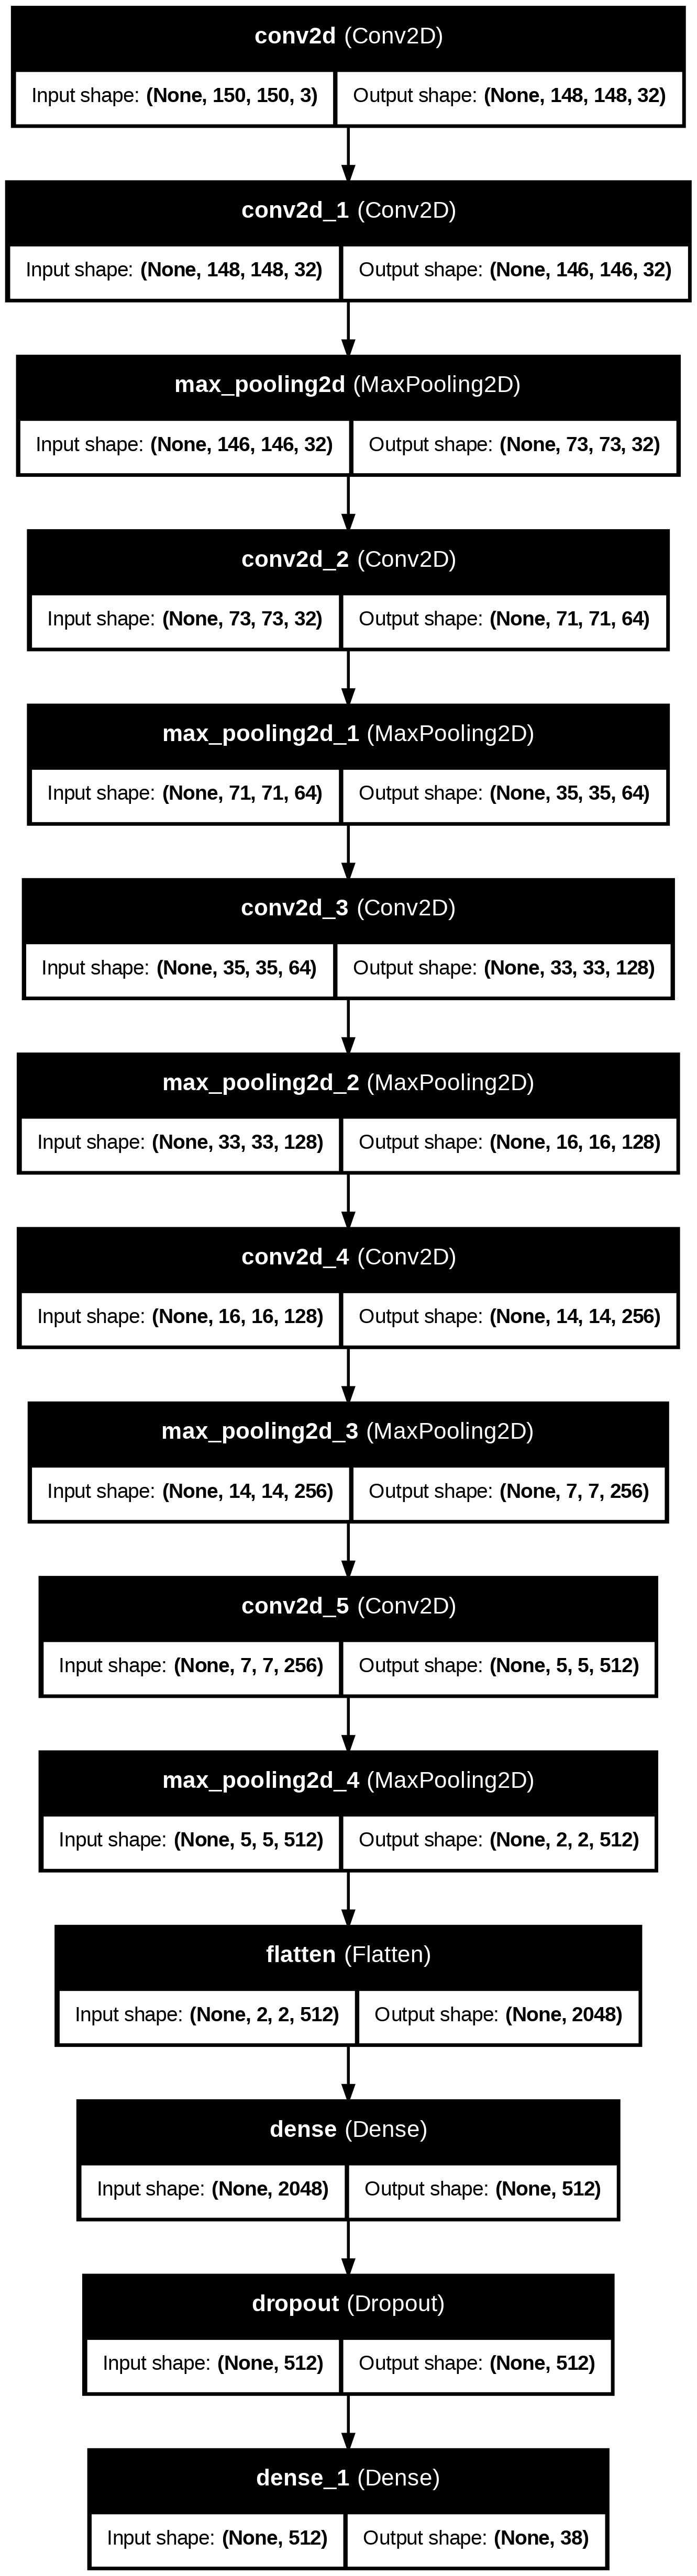

In [11]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# **Fitting the CNN Model:**

In [12]:
from tensorflow.keras import metrics
model.compile(optimizer='adam',loss='categorical_crossentropy'
              ,metrics=['accuracy',metrics.Recall(),metrics.Precision()])

In [13]:
early_stopping=EarlyStopping(monitor='val_loss',patience=5)
model_checkpoint=ModelCheckpoint(
    'best_model.keras',  # File path where the model will be saved
    monitor='val_loss',  # Metric to monitor
    save_best_only=True,  # Save only the model with the best validation loss
    mode='min',  # 'min' because lower loss is better
    verbose=1  # Verbosity mode
)

In [14]:
history=model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=50,
    callbacks=[early_stopping,model_checkpoint],
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


I0000 00:00:1759500235.376638      83 service.cc:148] XLA service 0x7a9764215490 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1759500235.377946      83 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1759500235.908974      83 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-10-03 14:04:03.385755: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[32,32,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[128,32,148,148]{3,2,1,0}, f32[128,32,146,146]{3,2,1,0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]} is taking a while...
2025-10-03 14:04:03.459150: E external/local_xla/x

  2/439 ━━━━━━━━━━━━━━━━━━━━ 38s 87ms/step - accuracy: 0.0488 - loss: 3.6327 - precision: 0.0000e+00 - recall: 0.0000e+00   

I0000 00:00:1759500246.548354      83 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


439/439 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1252 - loss: 3.1606 - precision: 0.4984 - recall: 0.0328
Epoch 1: val_loss improved from inf to 1.31931, saving model to best_model.keras
439/439 ━━━━━━━━━━━━━━━━━━━━ 727s 2s/step - accuracy: 0.1256 - loss: 3.1592 - precision: 0.4988 - recall: 0.0330 - val_accuracy: 0.5925 - val_loss: 1.3193 - val_precision: 0.7886 - val_recall: 0.4192
Epoch 2/50
  1/439 ━━━━━━━━━━━━━━━━━━━━ 38s 89ms/step - accuracy: 0.6641 - loss: 1.1726 - precision: 0.8219 - recall: 0.4688

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_loss did not improve from 1.31931
439/439 ━━━━━━━━━━━━━━━━━━━━ 81s 185ms/step - accuracy: 0.6641 - loss: 1.1726 - precision: 0.8219 - recall: 0.4688 - val_accuracy: 0.5821 - val_loss: 1.3415 - val_precision: 0.7707 - val_recall: 0.4161
Epoch 3/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 0s 794ms/step - accuracy: 0.6232 - loss: 1.2068 - precision: 0.7759 - recall: 0.4830
Epoch 3: val_loss improved from 1.31931 to 0.65647, saving model to best_model.keras
439/439 ━━━━━━━━━━━━━━━━━━━━ 436s 993ms/step - accuracy: 0.6233 - loss: 1.2063 - precision: 0.7760 - recall: 0.4832 - val_accuracy: 0.7911 - val_loss: 0.6565 - val_precision: 0.8571 - val_recall: 0.7345
Epoch 4/50
  1/439 ━━━━━━━━━━━━━━━━━━━━ 38s 88ms/step - accuracy: 0.7188 - loss: 0.8918 - precision: 0.7810 - recall: 0.6406
Epoch 4: val_loss did not improve from 0.65647
439/439 ━━━━━━━━━━━━━━━━━━━━ 84s 192ms/step - accuracy: 0.7188 - loss: 0.8918 - precision: 0.7810 - recall: 0.6406 - val_accuracy: 0.7852 - val_loss: 0.6738 - val_pr

# **Showing Training and Validation Accuracy of Best Model after Finishing Training Epochs**

In [15]:
# using max to use best model saved by modelcheckpoint
train_accuracy = max(history.history['accuracy'])
val_accuracy = max(history.history['val_accuracy']) 

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

Training Accuracy: 0.9766
Validation Accuracy: 0.9584


# **Model Evaluation:**

In [16]:
results = model.evaluate(test_generator)
loss = results[0]
accuracy = results[1]
precision = results[2]
recall = results[3]

print(f'Testing Loss: {loss}')
print(f'Testing Accuracy: {accuracy}')
print(f'Testing Precision: {precision}')
print(f'Testing Recall: {recall}')

138/138 ━━━━━━━━━━━━━━━━━━━━ 129s 932ms/step - accuracy: 0.9556 - loss: 0.1446 - precision: 0.9629 - recall: 0.9509
Testing Loss: 0.14624230563640594
Testing Accuracy: 0.954757571220398
Testing Precision: 0.9503186941146851
Testing Recall: 0.9609829187393188


# **Visualization of CNN Model Evaluation Metrics:**

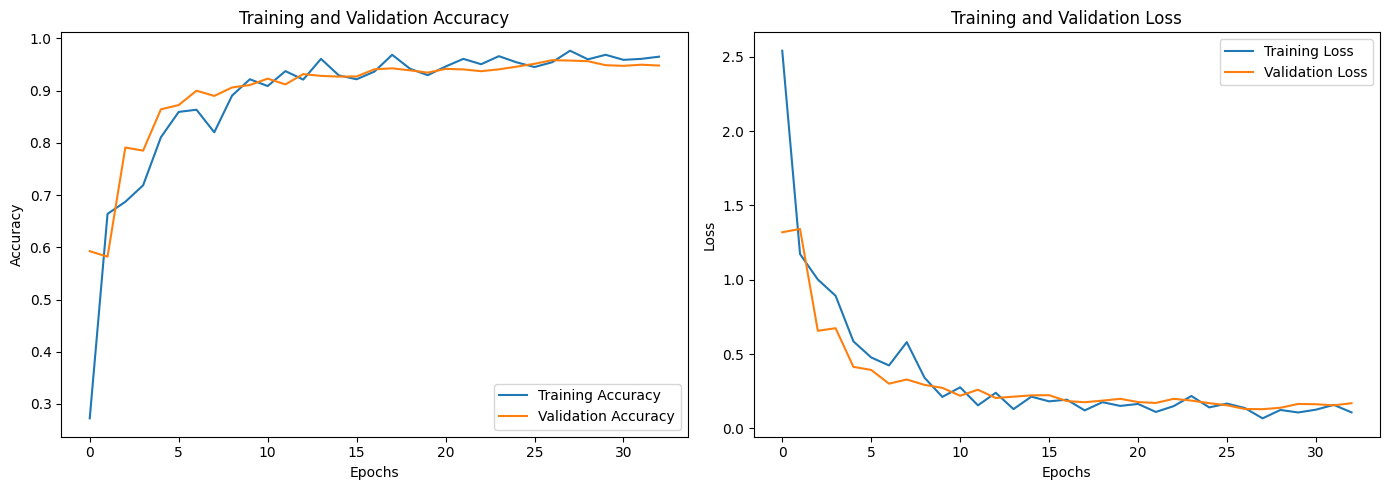

In [17]:

import matplotlib.pyplot as plt

# Create a figure with 1 row and 2 columns for subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Plot training and validation accuracy
axs[0].plot(history.history['accuracy'], label='Training Accuracy')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()

# Plot training and validation loss
axs[1].plot(history.history['loss'], label='Training Loss')
axs[1].plot(history.history['val_loss'], label='Validation Loss')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [18]:
# Get predictions on the validation set
y_probs = model.predict(validation_generator)   # probabilities for each class
y_pred = np.argmax(y_probs, axis=1)             # pick highest probability class


110/110 ━━━━━━━━━━━━━━━━━━━━ 82s 741ms/step


110/110 ━━━━━━━━━━━━━━━━━━━━ 81s 732ms/step


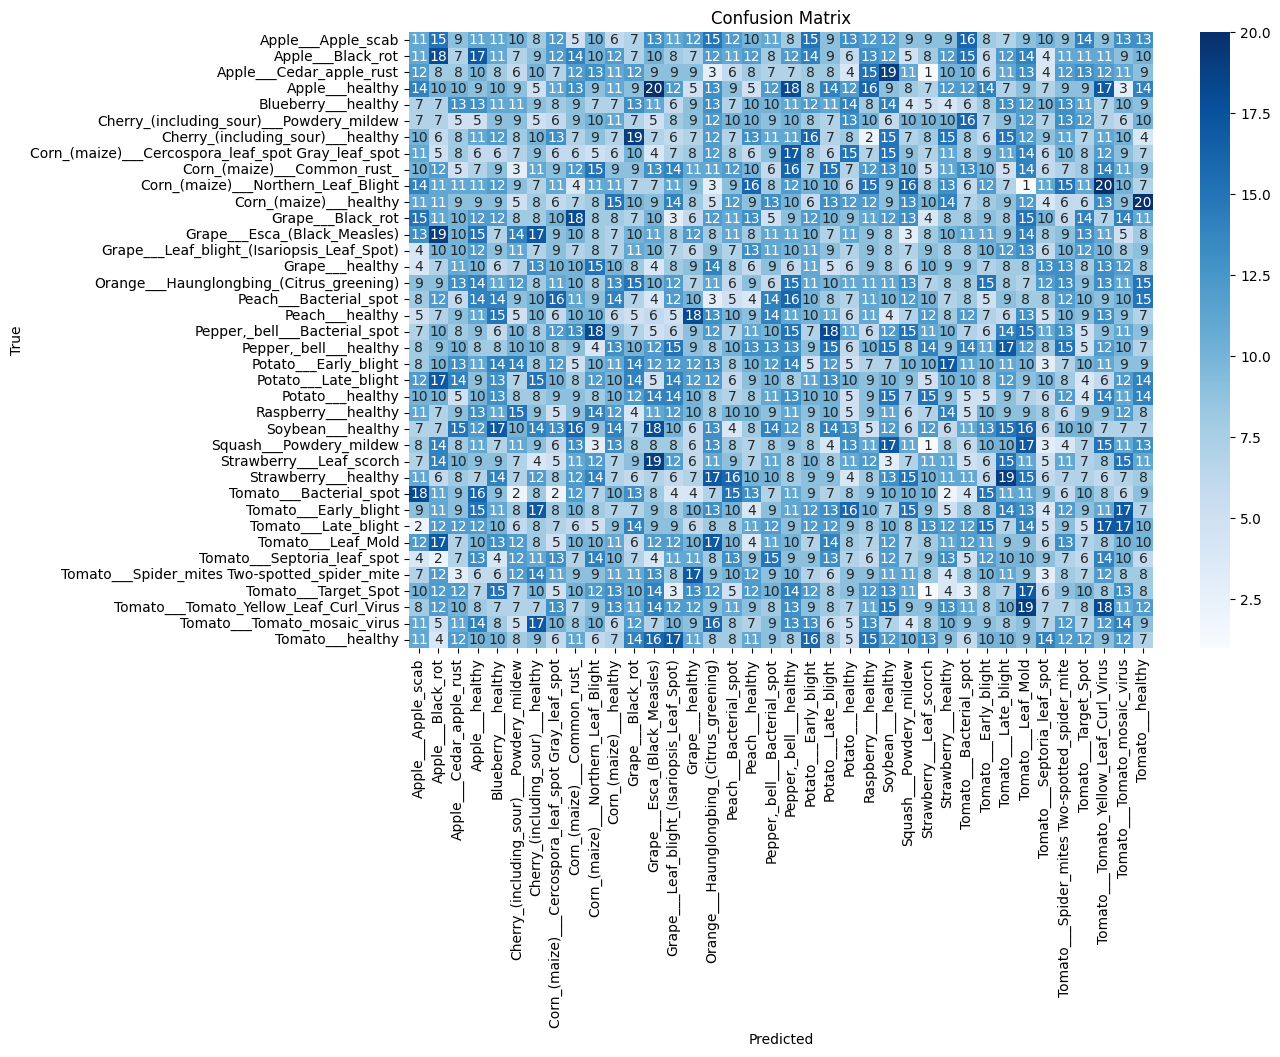

Classification Report:

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.03      0.03      0.03       403
                                 Apple___Black_rot       0.05      0.05      0.05       397
                          Apple___Cedar_apple_rust       0.02      0.02      0.02       352
                                   Apple___healthy       0.02      0.02      0.02       401
                               Blueberry___healthy       0.03      0.03      0.03       363
          Cherry_(including_sour)___Powdery_mildew       0.03      0.03      0.03       336
                 Cherry_(including_sour)___healthy       0.03      0.03      0.03       365
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.02      0.02      0.02       328
                       Corn_(maize)___Common_rust_       0.03      0.03      0.03       381
               Corn_(maize)___Northern_Leaf_Blight     

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Get predictions
y_probs = model.predict(validation_generator)   # probabilities
y_pred = np.argmax(y_probs, axis=1)             # predicted labels
y_true = validation_generator.classes           # true labels

# Step 2: Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
labels = list(validation_generator.class_indices.keys())

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Step 3: Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=labels))


# **Evaluation Function For all Train,Valid and Test**

In [20]:
def Evaluate_model(model, train_generator, validation_generator, test_generator):
    model_evaluate_train = model.evaluate(train_generator)
    print("Loss       : ", model_evaluate_train[0])
    print("Accuracy   : ", model_evaluate_train[1])
    print("Precision  : ", model_evaluate_train[2])
    print("Recall     : ", model_evaluate_train[3])

    
    model_evaluate_valid = model.evaluate(validation_generator)
    print("Loss       : ", model_evaluate_valid[0])
    print("Accuracy   : ", model_evaluate_valid[1])
    print("Precision  : ", model_evaluate_valid[2])
    print("Recall     : ", model_evaluate_valid[3])
    

    model_evaluate_test = model.evaluate(test_generator)
    print("Loss       : ", model_evaluate_test[0])
    print("Accuracy   : ", model_evaluate_test[1])
    print("Precision  : ", model_evaluate_test[2])
    print("Recall     : ", model_evaluate_test[3])

    return np.round(model_evaluate_train[0], 2), np.round(model_evaluate_test[0], 2), \
           np.round(model_evaluate_train[1], 2), np.round(model_evaluate_test[1], 2), \
           np.round(model_evaluate_train[2], 2), np.round(model_evaluate_test[2], 2), \
           np.round(model_evaluate_train[3], 2), np.round(model_evaluate_test[3], 2)

# **Print all Evaluation Metrics of both Train,Valid,Testing**

In [21]:
Final_Report = []

Final_Report.append(Evaluate_model(model, train_generator, validation_generator, test_generator))

440/440 ━━━━━━━━━━━━━━━━━━━━ 320s 727ms/step - accuracy: 0.9727 - loss: 0.0791 - precision: 0.9764 - recall: 0.9700
Loss       :  0.08076335489749908
Accuracy   :  0.9725871682167053
Precision  :  0.969813883304596
Recall     :  0.9758684635162354
110/110 ━━━━━━━━━━━━━━━━━━━━ 79s 722ms/step - accuracy: 0.9473 - loss: 0.1783 - precision: 0.9531 - recall: 0.9433
Loss       :  0.1687195748090744
Accuracy   :  0.9485901594161987
Precision  :  0.9446738958358765
Recall     :  0.9543231129646301
138/138 ━━━━━━━━━━━━━━━━━━━━ 34s 243ms/step - accuracy: 0.9543 - loss: 0.1436 - precision: 0.9612 - recall: 0.9498
Loss       :  0.14624235033988953
Accuracy   :  0.954757571220398
Precision  :  0.9503186941146851
Recall     :  0.9609829187393188


# **Save the Model:**

In [ ]:
model.save('my_cnn_model.h5')
